In [24]:
# Import pandas library
import pandas as pd


In [25]:
# Read Auto dataset.
df = pd.read_csv('Auto.csv', na_values = ["?"])
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


The quantitative variables are mpg, displacement, horsepower, weight, and acceleration. Depending on the context, we may want to treat cylinders and year as quantitative predictors or qualitative ones. Lastly, origin is a qualitative predictor. origin is a quantitative encoding of a car's country of origin, where 1 denotes American, 2 denotes European, and 3 denotes Japanese.

In [26]:
# Check for missing values.
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [27]:
# Since there are only 5 missing values from the "horsepower" column, we can choose to drop them.
df.dropna(inplace=True)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [28]:
# Range = max - min
# The argument axis = 0 means that we compute the max/min along each index.
df_max = df.loc[:, "mpg":"year"].max(axis = 0)
df_min = df.loc[:, "mpg":"year"].min(axis = 0)
df_range = df_max - df_min

# Generate a dataframe with the max, min, and range for each quantitative variable.
pd.DataFrame({"max":df_max, "min":df_min, "range":df_range})

# The range of each quantitative predictor is shown below.

,max,min,range
mpg,46.6,9.0,37.6
cylinders,8.0,3.0,5.0
displacement,455.0,68.0,387.0
horsepower,230.0,46.0,184.0
weight,5140.0,1613.0,3527.0
acceleration,24.8,8.0,16.8
year,82.0,70.0,12.0


In [29]:
# Compute mean of each quantitative variable
df_mean = df.loc[:, "mpg":"year"].mean(axis = 0)
# Compute standard deviation of each quantitative variable
df_sd = df.loc[:, "mpg":"year"].std(axis = 0)

# Generate a dataframe with the mean and standard deviation of each quantitative predictor
pd.DataFrame({"mean":df_mean, "std dev":df_sd})

,mean,std dev
mpg,23.445918,7.805007
cylinders,5.471939,1.705783
displacement,194.411990,104.644004
horsepower,104.469388,38.491160
weight,2977.584184,849.402560
acceleration,15.541327,2.758864
year,75.979592,3.683737


#### Range, mean and standard deviation of each predictor from the 10th - 85th observation.

In [30]:
# Reset the index of the at data frame
df.reset_index(drop = True, inplace = True)

# Create dataframe in which the 10th through 85th observations are dropped
df_dropped = df.drop(index = list(range(9, 85)))

# Compute max, min, range, mean, and standard deviation for each quantitative variable
dropped_max = df_dropped.loc[:, "mpg":"year"].max(axis = 0)
dropped_min = df_dropped.loc[:, "mpg":"year"].min(axis = 0)
dropped_range = dropped_max - dropped_min
dropped_mean = df_dropped.loc[:, "mpg":"year"].mean(axis = 0)
dropped_sd = df_dropped.loc[:, "mpg":"year"].std(axis = 0)

# Generate a dataframe with the max, min, range, mean, and standard deviation for each quantitative variable
pd.DataFrame({"max":dropped_max, "min":dropped_min, "range":dropped_range, "mean":dropped_mean, "std dev":dropped_sd})

,max,min,range,mean,std dev
mpg,46.6,11.0,35.6,24.404430,7.867283
cylinders,8.0,3.0,5.0,5.373418,1.654179
displacement,455.0,68.0,387.0,187.240506,99.678367
horsepower,230.0,46.0,184.0,100.721519,35.708853
weight,4997.0,1649.0,3348.0,2935.971519,811.300208
acceleration,24.8,8.5,16.3,15.726899,2.693721
year,82.0,70.0,12.0,77.145570,3.106217


#### DATA VISUALIZATION

In [31]:
# Convert the origin column from numerical codes to the meanings of each code.
# 1 = American, 2 = European, 3 = Japanese.
origin_dict = {1: "American", 2: "European", 3: "Japanese"}
df["origin"] = df["origin"].transform(lambda x: origin_dict[x]).astype("category")

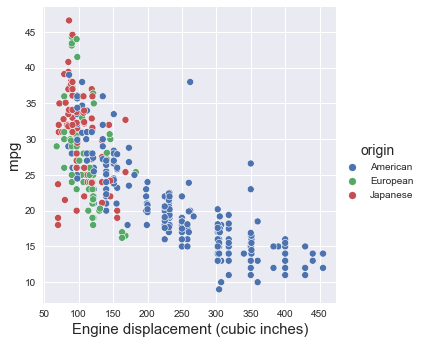

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create scatter plot for the relationship between engine displacement and mpg.
# Use hue to highlight the origin of each car.
g = sns.relplot(x = "displacement", y = "mpg", hue = "origin", data = df)
g.set(xlabel = "Engine displacement (cubic inches)")
plt.show()

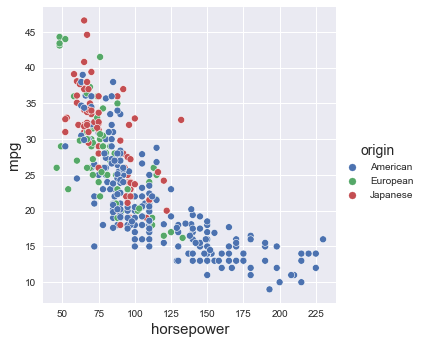

In [33]:
# Create scatter plot for the relationship between horsepower and mpg.
# Use hue to highlight the origin of each car.
g = sns.relplot(x = "horsepower", y = "mpg", hue = "origin", data = df)
plt.show()

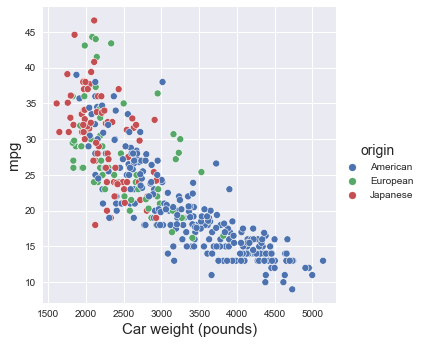

In [34]:
# Create scatter plot for the relationship between car weight and mpg.
# Use hue to highlight the origin of each car.
g = sns.relplot(x = "weight", y = "mpg", hue = "origin", data = df)
g.set(xlabel = "Car weight (pounds)")
plt.show()

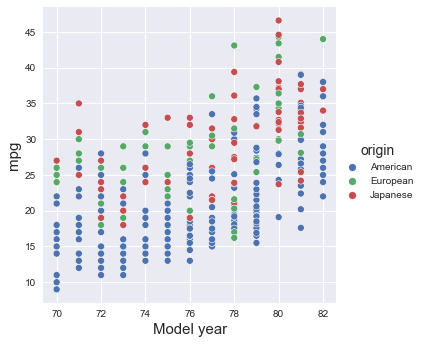

In [35]:
# Create scatter plot for the relationship between model year and mpg.
# Use hue to highlight the origin of each car.
g = sns.relplot(x = "year", y = "mpg", hue = "origin", data = df)
g.set(xlabel = "Model year")
plt.show()

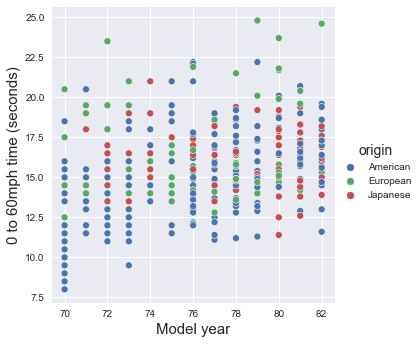

In [36]:
# Create scatter plot for the relationship between model year and acceleration.
# Use hue to highlight the origin of each car.
g = sns.relplot(x = "year", y = "acceleration", hue = "origin", data = df)
g.set(xlabel = "Model year", ylabel = "0 to 60mph time (seconds)")
plt.show()

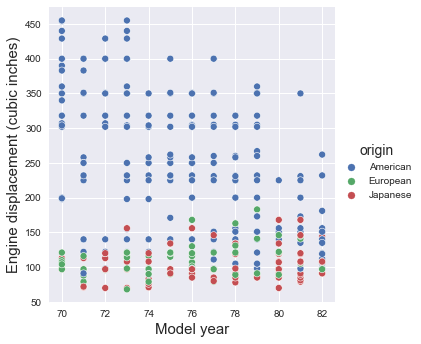

In [37]:
# Create scatter plot for the relationship between model year and engine displacement.
# Use hue to highlight the origin of each car.
g = sns.relplot(x = "year", y = "displacement", hue = "origin", data = df)
g.set(xlabel = "Model year", ylabel = "Engine displacement (cubic inches)")
plt.show()

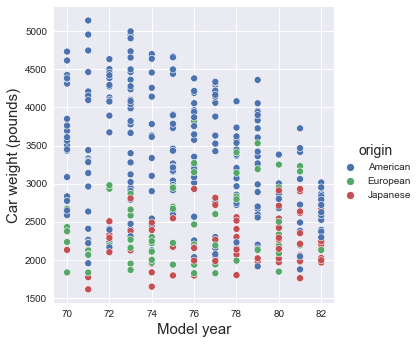

In [38]:
# Create scatter plot for the relationship between model year and car weight.
# Use hue to highlight the origin of each car.
g = sns.relplot(x = "year", y = "weight", hue = "origin", data = df)
g.set(xlabel = "Model year", ylabel = "Car weight (pounds)")
plt.show()

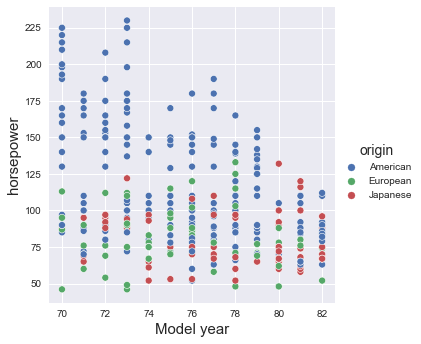

In [39]:
# Create scatter plot for the relationship between model year and horsepower.
# Use hue to highlight the origin of each car.
g = sns.relplot(x = "year", y = "horsepower", hue = "origin", data = df)
g.set(xlabel = "Model year", ylabel = "horsepower")
plt.show()

Looking at how various car characteristics change with model year, we see that there aren't any strong relationships. There are still some weak relationships, such as max engine displacement, car weight, and horsepower generally decreasing from 1970 to 1982.

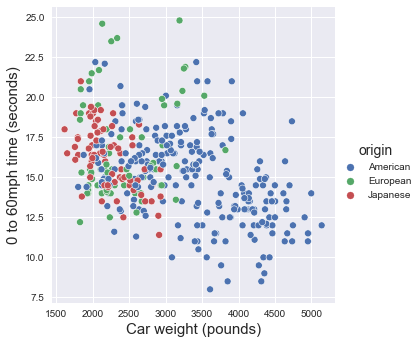

In [40]:
# Create scatter plot for the relationship between car weight and acceleration.
# Use hue to highlight the origin of each car.
g = sns.relplot(x = "weight", y = "acceleration", hue = "origin", data = df)
g.set(xlabel = "Car weight (pounds)", ylabel = "0 to 60mph time (seconds)")
plt.show()

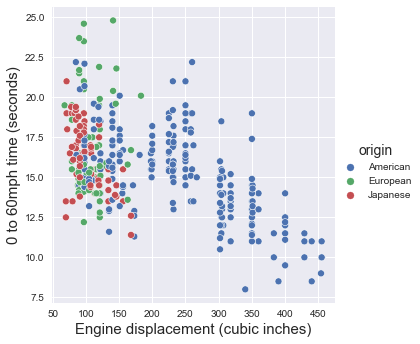

In [41]:
# Create scatter plot for the relationship between engine displacement and acceleration.
# Use hue to highlight the origin of each car.
g = sns.relplot(x = "displacement", y = "acceleration", hue = "origin", data = df)
g.set(xlabel = "Engine displacement (cubic inches)", ylabel = "0 to 60mph time (seconds)")
plt.show()

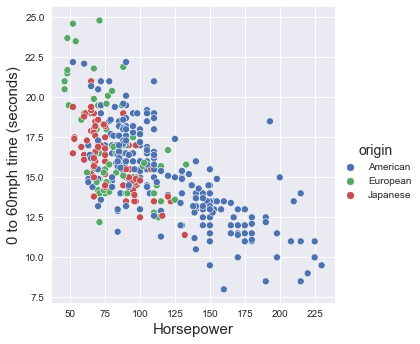

In [42]:
# Create scatter plot for the relationship between horsepower and acceleration.
# Use hue to highlight the origin of each car.
g = sns.relplot(x = "horsepower", y = "acceleration", hue = "origin", data = df)
g.set(xlabel = "Horsepower", ylabel = "0 to 60mph time (seconds)")
plt.show()

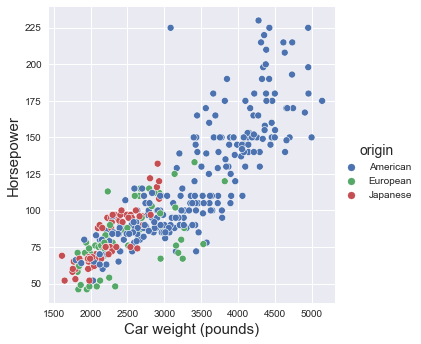

In [43]:
# Create scatter plot for the relationship between car weight and horsepower.
# Use hue to highlight the origin of each car.
g = sns.relplot(x = "weight", y = "horsepower", hue = "origin", data = df)
g.set(xlabel = "Car weight (pounds)", ylabel = "Horsepower")
plt.show()

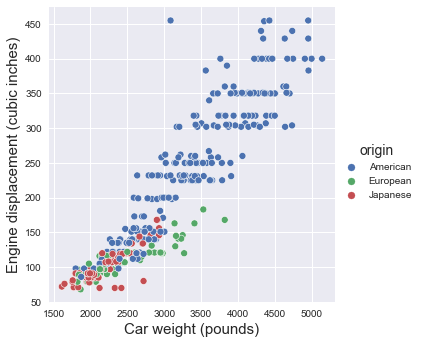

In [44]:
# Create scatter plot for the relationship between car weight and engine displacement.
# Use hue to highlight the origin of each car.
g = sns.relplot(x = "weight", y = "displacement", hue = "origin", data = df)
g.set(xlabel = "Car weight (pounds)", ylabel = "Engine displacement (cubic inches)")
plt.show()

The relationship between the number of seconds it takes a car to accelerate from 0 to 60 miles per hour and a number of different factors was explored in the scatter plots. As expected, the 0-to-60 time clearly decreases with increased engine displacement and increased horsepower. There is also a weak relationship that as the number of engine cylinders increases the 0-to-60 time tends to decrease. While it may seem counter-intuitive at first, the 0-to-60 time also tends to decrease with car weight. The last two scatterplots shows that the higher weight is correlated with higher horsepower and higher engine displacement.

Based on the scatter plots which relate miles per gallon to the predictors engine displacement, horsepower, car weight, and model year, it seems as if the first three factors would be most helpful in predicting mpg, with model year still potentially being helpful but less so. There are clear relationships that increasing engine displacement/horsepower/car weight results in decreased fuel efficiency. There is also a weak relationship that fuel efficiency generally increased going from 1970 to 1982.

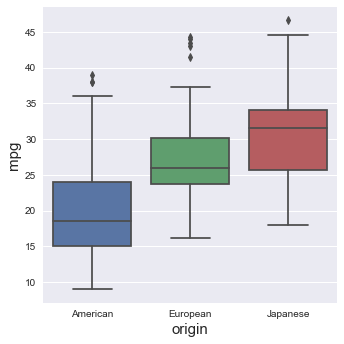

In [45]:
# Create box plot comparing the fuel effiency of American, European, and Japanese cars
g = sns.catplot(x = "origin", y = "mpg", data = df, kind = "box")

Looking at the above box plot, it can be seen that there is a relationship between a car's country of origin and 
fuel efficiency, where on average Japanese cars are the most efficient, 
followed by European cars and then by American cars.

Diagnostic plots of the least squares reqression fit.

-A plot of residuals against fitted values, 

-A Scale-Location plot of sqrt(|residuals|) against fitted values, 

-A Normal Q-Q plot, 

-A plot of residuals against leverages.

d:\Documents\PROJECTS\Python Programming\Machine Learning\ml_dependencies\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


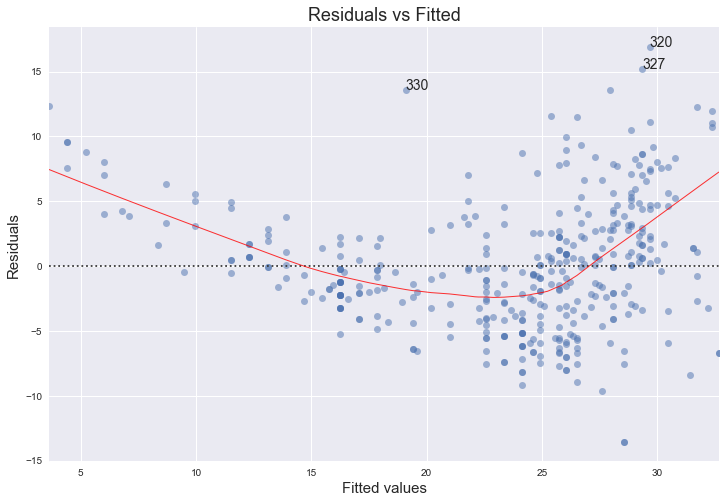

In [46]:
from statsmodels.graphics.gofplots import ProbPlot
import statsmodels.formula.api as smf
import numpy as np

plt.style.use('seaborn')
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

model_f = 'mpg ~ horsepower'

df.reset_index(drop=True, inplace=True)

model = smf.ols(formula=model_f, data=df)

model_fit = model.fit()

# fitted values (need a constant term for intercept)
model_fitted_y = model_fit.fittedvalues

# model residuals
model_residuals = model_fit.resid

# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

# Residuals against fitted values
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'mpg', data=df,
                                  lowess=True,
                                  scatter_kws={'alpha': 0.5},
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')


# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]))

The red line above is a smooth fit to the residuals which helps to spot any trends. We can clearly see a strong non-linearity indicated by the curve of the red line. The funnel shape of the plotted residuals indicates the presence of heteroscedasticity.

d:\Documents\PROJECTS\Python Programming\Machine Learning\ml_dependencies\lib\site-packages\statsmodels\graphics\gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


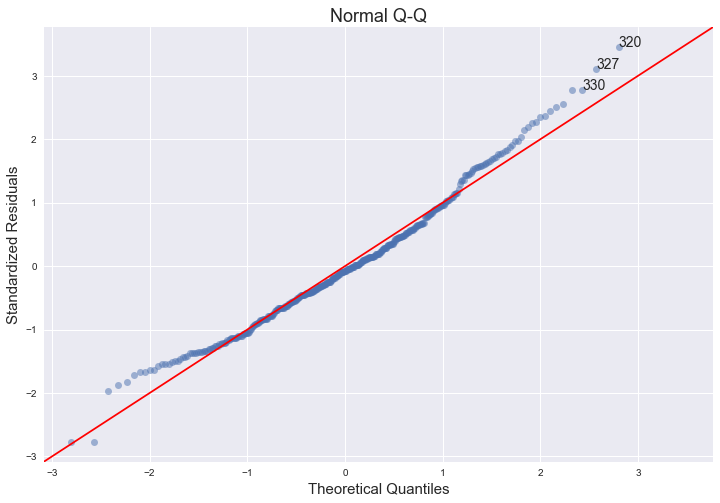

In [47]:
# Normal Q-Q plot
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals')

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]))

The qq-plot above indicates that the assumption of normality does hold, since we can fit a straight line quite well, although there seems to be a slight left skew.

d:\Documents\PROJECTS\Python Programming\Machine Learning\ml_dependencies\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


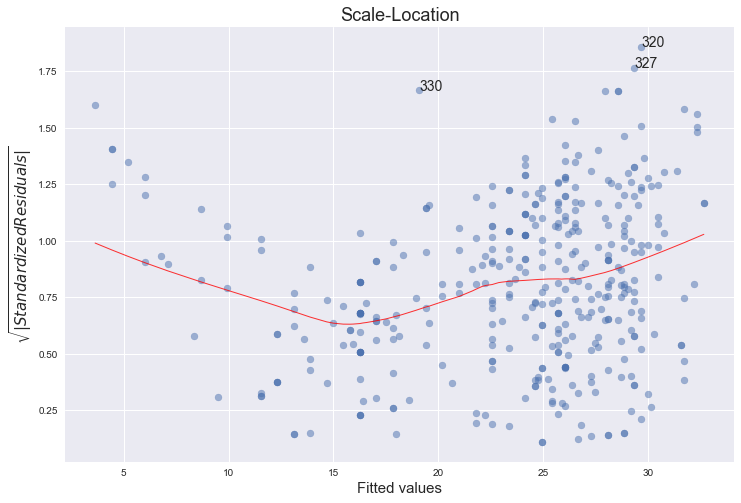

In [48]:
# Scale-Location plot of sqrt(|residuals|) against fitted values.
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)

plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');


for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_norm_residuals_abs_sqrt[i]))

The third plot above is a scale-location plot (square rooted standardized residual vs. predicted value). This is useful for checking the assumption of homoscedasticity. In this particular plot we are checking to see if there is a pattern in the residuals. It is clear from the plot that the assumption of homoscedasticity is not held.

d:\Documents\PROJECTS\Python Programming\Machine Learning\ml_dependencies\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


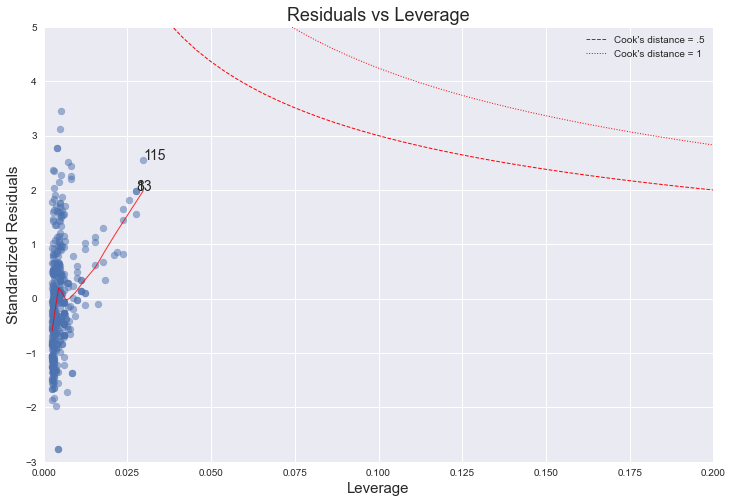

In [49]:
# Residuals against leverages.
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))

# shenanigans for cook's distance contours
def graph(formula, x_range, label=None, ls='-'):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls=ls, color='red')

p = len(model_fit.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance = .5', ls='--') # 0.5 line

graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 'Cook\'s distance = 1', ls=':') # 1 line

plt.legend(loc='upper right')

The fourth plot is of "Cook's distance", which is a measure of the influence of each observation on the regression coefficients. The Cook's distance statistic is a measure, for each observation in turn, of the extent of change in model estimates when that particular observation is omitted. Any observation for which the Cook's distance is close to 1 or more, or that is substantially larger than other Cook's distances (highly influential data points), requires investigation. On the other hand, from the plot we can see that every point has a Cook's distance well below 1, which indicates that no point has much individual influence on the fit.

#### SIMPLE LINEAR REGRESSION

In [50]:
# create a linear regression model using ols fitting
lm_fit = smf.ols(formula='mpg~horsepower', data=df).fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Wed, 16 Mar 2022   Prob (F-statistic):           7.03e-81
Time:                        22:45:01   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the summary, the simple linear regression gives a model Y = ̂39.9359 - -0.1578X1. A p-value of essentially 0 for β1 = -0.1578 is a strong evidence that there is a relationship between mpg and horsepower. Since R-squared = 0.606, approximately 60.6% of the variability between mpg and horsepower is explained by the simple linear regression model.

The value of β1 = -0.1578 indicates that each increase of 1 horsepower results on average in a decrease of 0.157845 miles per gallon in the model. In other words, there is a negative relationship between the predictor and the response in the model.

In [51]:
# Prediction of mpg for horsepower = 98 using StatsModels.
lm_fit.predict(pd.DataFrame({"horsepower": [98]}))

# From the result below, plugging in a horsepower value of 98 gives a predicted mpg of 24.467077.

0    24.467077
dtype: float64

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

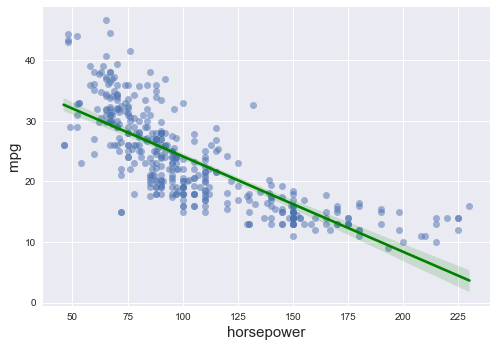

In [52]:
# A plot of mpg against horsepower with the least squares regression line using regplot() from Seaborn.
sns.regplot(x = "horsepower", y = "mpg", data = df, scatter_kws = {"alpha": 0.5}, line_kws = {"color": "green"})

#### Creating a binary variable "mpg01" that contains a "1" if mpg contains a value above its median, and a "0" if mpg contains a value below its median.

In [53]:
mpg01 = (df["mpg"] > df["mpg"].median()).map({False: "0", True: "1"})
df["mpg01"] = mpg01
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130.0,3504,12.0,70,American,chevrolet chevelle malibu,0
1,15.0,8,350.0,165.0,3693,11.5,70,American,buick skylark 320,0
2,18.0,8,318.0,150.0,3436,11.0,70,American,plymouth satellite,0
3,16.0,8,304.0,150.0,3433,12.0,70,American,amc rebel sst,0
4,17.0,8,302.0,140.0,3449,10.5,70,American,ford torino,0


#### DATA EXPLORATION OF THE RELATIONSHIPS BETWEEN mpg01 AND OTHER FEATURES

Text(0.5, 0.925, 'Boxplots for cars with above and below median mpg')

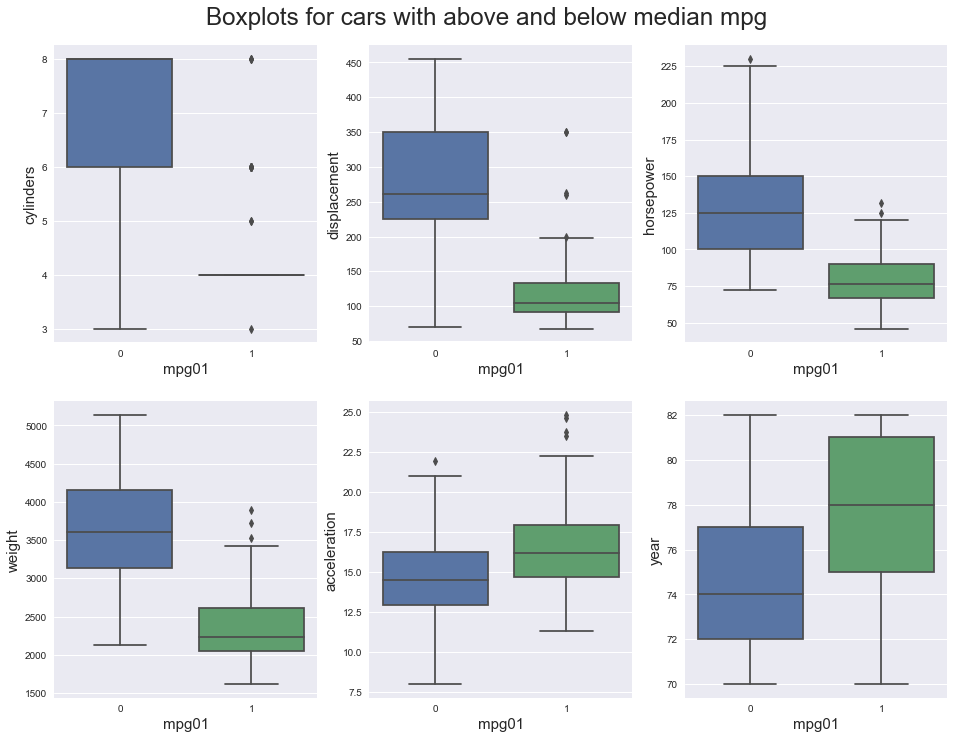

In [54]:
# Boxplot of mgp01 and other predictors.
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (16, 12))
sns.boxplot(x = "mpg01", y = "cylinders", data = df, ax = axes[0, 0])
sns.boxplot(x = "mpg01", y = "displacement", data = df, ax = axes[0, 1])
sns.boxplot(x = "mpg01", y = "horsepower", data = df, ax = axes[0, 2])
sns.boxplot(x = "mpg01", y = "weight", data = df, ax = axes[1, 0])
sns.boxplot(x = "mpg01", y = "acceleration", data = df, ax = axes[1, 1])
sns.boxplot(x = "mpg01", y = "year", data = df, ax = axes[1, 2])
fig.suptitle("Boxplots for cars with above and below median mpg", size = "xx-large", y = 0.925)

From the boxplots, we see that the majority of cars with above-median mpg have four-cylinder engines for the boxplot in the upper left corner. Moving to the upper-middle pair of the boxplots, at least 75% of the cars with above-median
mpg have smaller engines than 75% of the cars with below-median mpg. This is also true for horsepower (upper-right pair of boxplots) and weight (lower-left pair of boxplots). We also see in the final two pairs of boxplots, for acceleration and manufacture year, that while there are definitely differences between cars with 
above-median mpg and those with below-median mpg, the differences aren't as strong compared to the first four predictors.

d:\Documents\PROJECTS\Python Programming\Machine Learning\ml_dependencies\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\Documents\PROJECTS\Python Programming\Machine Learning\ml_dependencies\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\Documents\PROJECTS\Python Programming\Machine Learning\ml_dependencies\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be remove

Text(0.5, 0.925, 'Histograms and KDE plots for cars with 1 (orange) and 0 (blue) median mpg')

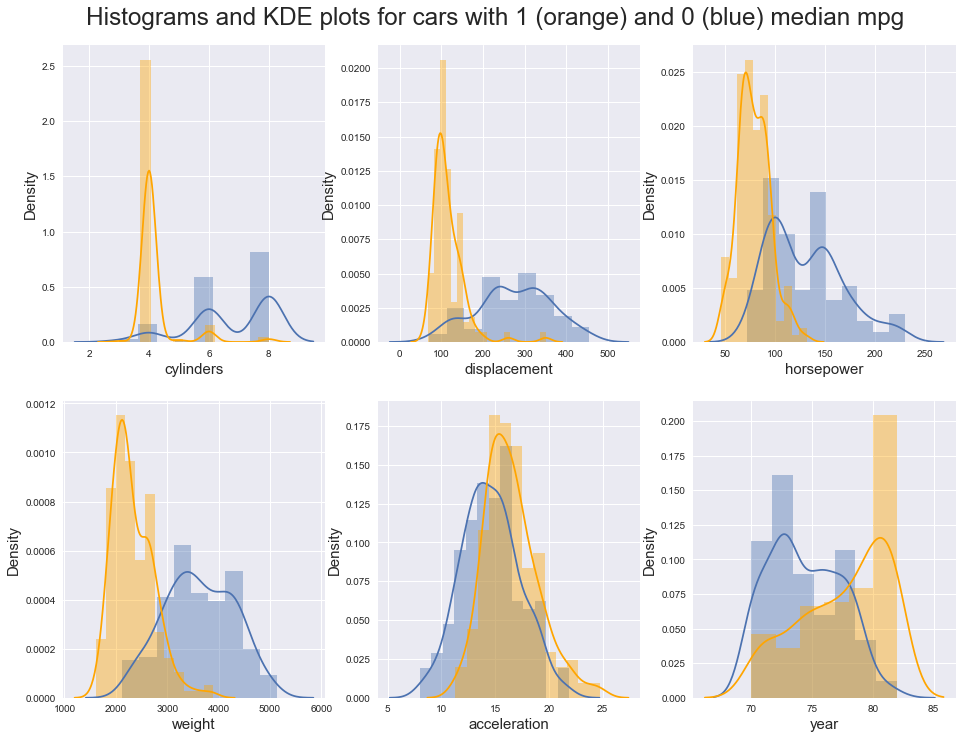

In [55]:
# Histogram
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (16, 12))
sns.distplot(df.loc[df["mpg01"] == "0", "cylinders"], ax = axes[0, 0])
sns.distplot(df.loc[df["mpg01"] == "1", "cylinders"], ax = axes[0, 0], color = "orange")
sns.distplot(df.loc[df["mpg01"] == "0", "displacement"], ax = axes[0, 1])
sns.distplot(df.loc[df["mpg01"] == "1", "displacement"], ax = axes[0, 1], color = "orange")
sns.distplot(df.loc[df["mpg01"] == "0", "horsepower"], ax = axes[0, 2])
sns.distplot(df.loc[df["mpg01"] == "1", "horsepower"], ax = axes[0, 2], color = "orange")
sns.distplot(df.loc[df["mpg01"] == "0", "weight"], ax = axes[1, 0])
sns.distplot(df.loc[df["mpg01"] == "1", "weight"], ax = axes[1, 0], color = "orange")
sns.distplot(df.loc[df["mpg01"] == "0", "acceleration"], ax = axes[1, 1])
sns.distplot(df.loc[df["mpg01"] == "1", "acceleration"], ax = axes[1, 1], color = "orange")
sns.distplot(df.loc[df["mpg01"] == "0", "year"], ax = axes[1, 2])
sns.distplot(df.loc[df["mpg01"] == "1", "year"], ax = axes[1, 2], color = "orange")
fig.suptitle("Histograms and KDE plots for cars with 1 (orange) and 0 (blue) median mpg",
             size = "xx-large", y = 0.925)

The histogram above provides further evidence to suggest that horsepower and weight will be useful in predicting mpg01, with decently clear separations between the distribution peaks between above-median and below-median cars. 
The plot involving cylinders seems to indicate that that variable wouldn't be as helpful on on its own. The small number of possibilities for the number of engine cylinders results in a lot of overlap, though there is a very prononunced peak that indicates a large number of cars with above-median fuel efficiency 
have four-cylinder engines. The significant overlap between groups for the acceleration plot is further evidence to suggest that acceleration will not be a variable that is helpful in predicting mpg01.

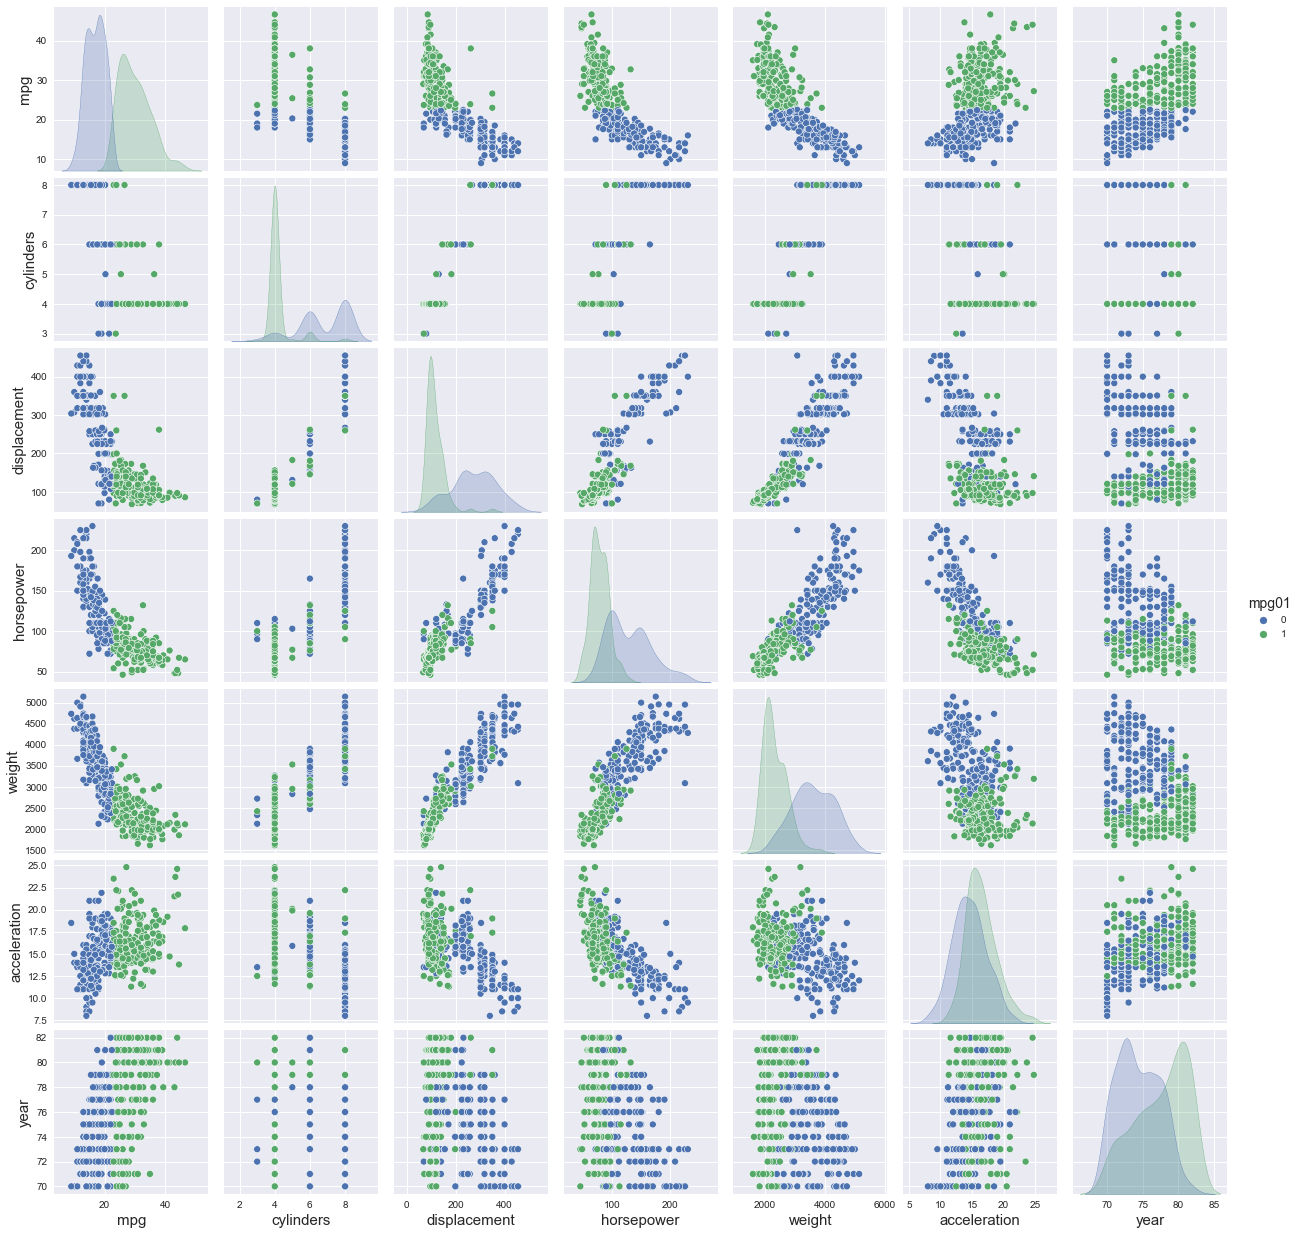

In [56]:
# Scatterplot matrix.
sns.pairplot(df, hue = "mpg01")

For the remaining part of the analysis, all of the predictors except for acceleration and name will be used to predict mpg01. Also, mpg will be excluded because it was directly used to create the classification label.

In [57]:
# Import classes from scikit-learn for logistic regression, LDA, QDA, and KNN classification.
# Import convenience function for computing confusion matrices.
# Import OneHotEncoder and StandardScaler for data pre-processing.
# Import Pipeline, ColumnTransformer to encapsulate pre-processing heterogenous data and fitting
# into a single estimator.
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [58]:
# 70% of the data will be used for the training set and the remaining 30% for the test set.
x_train, x_test, y_train, y_test = train_test_split(df, df["mpg01"], test_size = 0.30, random_state = 312)

#### LINEAR DISCRIMINANT ANALYSIS

[Text(0.5, 29.5, 'predicted label'),
 Text(125.71000000000001, 0.5, 'true label')]

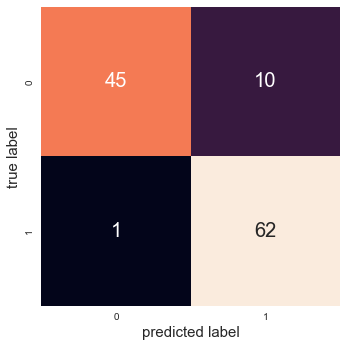

In [59]:
# LDA
categorical_features = ["origin"]
categorical_transformer = Pipeline([("onehot", OneHotEncoder(drop = "first"))])
numerical_features = ["cylinders", "displacement", "horsepower", "weight", "year"]
preprocessor = ColumnTransformer([("cat", categorical_transformer, categorical_features),
                                 ("num", "passthrough", numerical_features)])
clf = Pipeline([("preprocessor", preprocessor), ("classifier", LinearDiscriminantAnalysis())])

# Confusion matrix.
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(mat, annot = True, cbar = False, ax = ax, fmt = "g", square = True, annot_kws = {"fontsize": "x-large"},
           xticklabels = clf["classifier"].classes_, yticklabels = clf["classifier"].classes_)
ax.set(xlabel = "predicted label", ylabel = "true label")

In [60]:
# Test error.
1 - clf.score(x_test, y_test)

0.09322033898305082

When using linear discriminant analysis to predict mpg01 using cylinders displacement, horsepower, weight, year, and origin, we had an overall test error of 9.32%. One thing of note is that this method only mis-classified one of the cars that actually had above-median fuel economy.

[Text(0.5, 29.5, 'predicted label'),
 Text(125.71000000000001, 0.5, 'true label')]

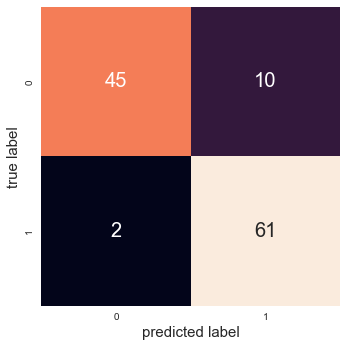

In [61]:
# Exclude the origin and year columns
categorical_features = []
categorical_transformer = Pipeline([("onehot", OneHotEncoder(drop = "first"))])
numerical_features = ["cylinders", "displacement", "horsepower", "weight"]
preprocessor = ColumnTransformer([("cat", categorical_transformer, categorical_features),
                                 ("num", "passthrough", numerical_features)])
clf = Pipeline([("preprocessor", preprocessor), ("classifier", LinearDiscriminantAnalysis())])

# Confusion matrix.
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(mat, annot = True, cbar = False, ax = ax, fmt = "g", square = True, annot_kws = {"fontsize": "x-large"},
           xticklabels = clf["classifier"].classes_, yticklabels = clf["classifier"].classes_)
ax.set(xlabel = "predicted label", ylabel = "true label")

In [62]:
# Test error.
1 - clf.score(x_test, y_test)

0.10169491525423724

Excluding the origin and year variables, the overall test error increases slightly to 10.2%.

#### QUADRATIC DISCRIMINANT ANALYSIS

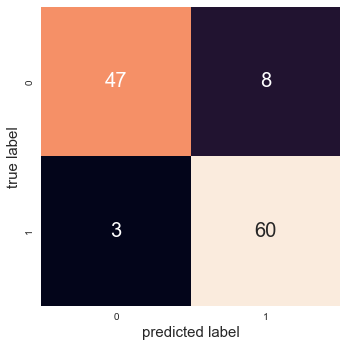

In [63]:
# QDA
categorical_features = ["origin"]
categorical_transformer = Pipeline([("onehot", OneHotEncoder(drop = "first"))])
numerical_features = ["cylinders", "displacement", "horsepower", "weight", "year"]
preprocessor = ColumnTransformer([("cat", categorical_transformer, categorical_features),
                                 ("num", "passthrough", numerical_features)])
clf = Pipeline([("preprocessor", preprocessor), ("classifier", QuadraticDiscriminantAnalysis())])

# Confusion matrix.
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(mat, annot = True, cbar = False, ax = ax, fmt = "g", square = True, annot_kws = {"fontsize": "x-large"},
           xticklabels = clf["classifier"].classes_, yticklabels = clf["classifier"].classes_)
ax.set(xlabel = "predicted label", ylabel = "true label");

In [64]:
# Test error.
1 - clf.score(x_test, y_test)

0.09322033898305082

When using quadratic discriminant analysis to predict mpg01 using cylinders, displacement, horsepower, weight, year, and origin, we had an overall test error of 9.32%, which is slight increase compared to linear discriminant analysis using all of those predictors

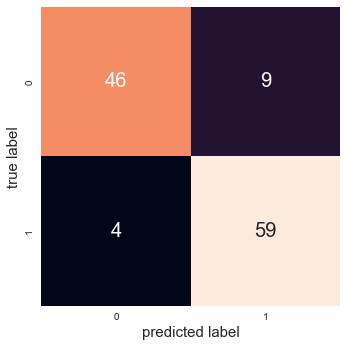

In [65]:
# Exclude the origin and year columns
categorical_features = []
categorical_transformer = Pipeline([("onehot", OneHotEncoder(drop = "first"))])
numerical_features = ["cylinders", "displacement", "horsepower", "weight"]
preprocessor = ColumnTransformer([("cat", categorical_transformer, categorical_features),
                                 ("num", "passthrough", numerical_features)])
clf = Pipeline([("preprocessor", preprocessor), ("classifier", QuadraticDiscriminantAnalysis())])

# Confusion matrix.
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(mat, annot = True, cbar = False, ax = ax, fmt = "g", square = True, annot_kws = {"fontsize": "x-large"},
           xticklabels = clf["classifier"].classes_, yticklabels = clf["classifier"].classes_)
ax.set(xlabel = "predicted label", ylabel = "true label");

In [66]:
# Test error.
1 - clf.score(x_test, y_test)

0.11016949152542377

Excluding the origin and year variables, the overall test error slightly increases up to 11.02%. 

#### LOGISTIC REGRESSION

d:\Documents\PROJECTS\Python Programming\Machine Learning\ml_dependencies\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


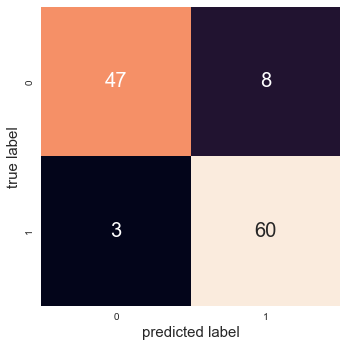

In [67]:
# Logistic regression.
categorical_features = ["origin"]
categorical_transformer = Pipeline([("onehot", OneHotEncoder(drop = "first"))])
numerical_features = ["cylinders", "displacement", "horsepower", "weight", "year"]
preprocessor = ColumnTransformer([("cat", categorical_transformer, categorical_features),
                                 ("num", "passthrough", numerical_features)])
clf = Pipeline([("preprocessor", preprocessor), 
                ("classifier", LogisticRegression(penalty = "none", solver = "lbfgs"))])

# Confusion matrix.
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(mat, annot = True, cbar = False, ax = ax, fmt = "g", square = True, annot_kws = {"fontsize": "x-large"},
           xticklabels = clf["classifier"].classes_, yticklabels = clf["classifier"].classes_)
ax.set(xlabel = "predicted label", ylabel = "true label");

In [68]:
# Test error.
1 - clf.score(x_test, y_test)

0.09322033898305082

Employing logistic regression to predict mpg01 using cylinders, displacement,horsepower, weight, year, and origin, we had an overall test error of 9.32%, which is comparable to the test errors we have obtained thus far with 
the other methods.

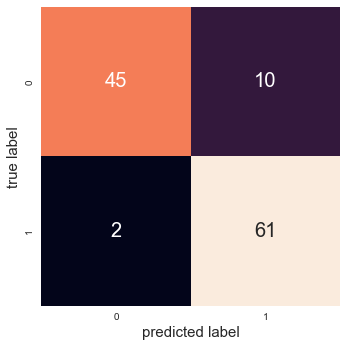

In [69]:
# Exclude the origin and year columns
categorical_features = []
categorical_transformer = Pipeline([("onehot", OneHotEncoder(drop = "first"))])
numerical_features = ["cylinders", "displacement", "horsepower", "weight"]
preprocessor = ColumnTransformer([("cat", categorical_transformer, categorical_features),
                                 ("num", "passthrough", numerical_features)])
clf = Pipeline([("preprocessor", preprocessor), 
                ("classifier", LogisticRegression(penalty = "none", solver = "lbfgs", max_iter = 500))])

# Confusion matrix.
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(mat, annot = True, cbar = False, ax = ax, fmt = "g", square = True, annot_kws = {"fontsize": "x-large"},
           xticklabels = clf["classifier"].classes_, yticklabels = clf["classifier"].classes_)
ax.set(xlabel = "predicted label", ylabel = "true label");

In [70]:
# Test error.
1 - clf.score(x_test, y_test)

0.10169491525423724

Excluding the origin and year variables, the overall test error increases slightly, with additional mis-classified predictions, to 10.17%.

Experiments will be carried out using k=1,3,5,…,19 for k -nearest neighbors. As in the previous parts, cylinders, displacement, horsepower, weight, and year will be used as the predictors. However, origin will be excluded as it is a qualitative variable.

### K NEAREST NEIGHBORS

In [71]:
# KNN
numerical_features = ["cylinders", "displacement", "horsepower", "weight", "year"]
numerical_transformer = Pipeline([("standardize", StandardScaler())])
preprocessor = ColumnTransformer([("num", numerical_transformer, numerical_features)])

np.random.seed(312)
k_vals = list(range(1, 21, 2))
knn_errors = {}
confusion_matrices = {}
for k in k_vals:
    clf = Pipeline([("preprocessor", preprocessor), ("classifier", KNeighborsClassifier(n_neighbors = k))])
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    confusion_matrices[k] = confusion_matrix(y_test, y_pred)
    knn_errors[k] = 1 - clf.score(x_test, y_test)
pd.Series(knn_errors)

1     0.076271
3     0.076271
5     0.076271
7     0.084746
9     0.084746
11    0.101695
13    0.084746
15    0.076271
17    0.084746
19    0.084746
dtype: float64

[Text(0.5, 29.5, 'predicted label'),
 Text(125.71000000000001, 0.5, 'true label')]

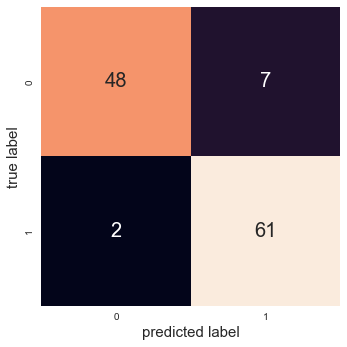

In [72]:
# Confusion matrix.
mat = confusion_matrices[pd.Series(knn_errors).idxmin()]
fig, ax = plt.subplots()
sns.heatmap(mat, annot = True, cbar = False, ax = ax, fmt = "g", square = True, annot_kws = {"fontsize": "x-large"},
           xticklabels = clf["classifier"].classes_, yticklabels = clf["classifier"].classes_)
ax.set(xlabel = "predicted label", ylabel = "true label")

From the above, we see that k=1 & 3 has the lowest test error, with a value of 7.63%. Another observation is that most of the errors were false positives i.e., the models classified as having above-median fuel efficiency which actually were in the below-median group. Excluding the year predictor to see how the test errors change:

In [73]:
numerical_features = ["cylinders", "displacement", "horsepower", "weight"]
numerical_transformer = Pipeline([("standardize", StandardScaler())])
preprocessor = ColumnTransformer([("num", numerical_transformer, numerical_features)])

np.random.seed(312)
k_vals = list(range(1, 21, 2))
knn_errors = {}
confusion_matrices = {}
for k in k_vals:
    clf = Pipeline([("preprocessor", preprocessor), ("classifier", KNeighborsClassifier(n_neighbors = k))])
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    confusion_matrices[k] = confusion_matrix(y_test, y_pred)
    knn_errors[k] = 1 - clf.score(x_test, y_test)
pd.Series(knn_errors)

1     0.101695
3     0.101695
5     0.101695
7     0.093220
9     0.093220
11    0.076271
13    0.084746
15    0.093220
17    0.093220
19    0.093220
dtype: float64

[Text(0.5, 29.5, 'predicted label'),
 Text(125.71000000000001, 0.5, 'true label')]

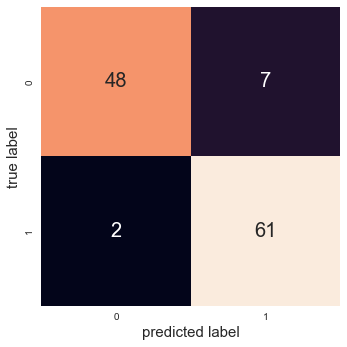

In [74]:
# Confusion matrix.
mat = confusion_matrices[pd.Series(knn_errors).idxmin()]
fig, ax = plt.subplots()
sns.heatmap(mat, annot = True, cbar = False, ax = ax, fmt = "g", square = True, annot_kws = {"fontsize": "x-large"},
           xticklabels = clf["classifier"].classes_, yticklabels = clf["classifier"].classes_)
ax.set(xlabel = "predicted label", ylabel = "true label")

Excluding the year predictor worsened the model especially for low values of k. The lowest test error was with k=15, 17 and 19. In conclusion, using k-nearest neighbors with k=1 and cylinders, displacement, horsepower, weight, and year as the predictors provided the lowest overall error on the held-out test set. Care should be taken and more evidence should be gathered by using cross-validation in order to better evaluate this model's accuracy.